In [1]:
import duckdb
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

import repl_utils
from variables import Variables as vars

plt.style.use("../../notebook.mplstyle")

START_TIME = datetime.now()
OUTPUT_DIR = f"output/0002-predictors/{START_TIME:%Y%m%d-%H%M%S}"

SAVE_PLOTS = True

os.makedirs(OUTPUT_DIR, exist_ok=True)

repl_utils.print_environment_info()

print(f"\n--------------------\nOutput directory: {OUTPUT_DIR}\n--------------------\n")

-------------------- Environment Information --------------------
date: 2025-12-24T13:34:20.305950
platform: Windows-11-10.0.26220-SP0
platform_version: 10.0.26220
cpu: Intel64 Family 6 Model 197 Stepping 2, GenuineIntel
cores: 16
physical_cores: 16
ram: 95 GB
ram_available: 62 GB
cuda: False
cuda_device_count: 0
cuda_device_0: False
python: 3.13.11 | packaged by conda-forge | (main, Dec  6 2025, 11:10:00) [MSC v.1944 64 bit (AMD64)]
numpy: 2.3.5
pandas: 2.3.3
scipy: 1.16.3
sklearn: 1.8.0
pytorch: 2.9.1
pymc: 5.27.0
pytensor: 2.36.1
arviz: 0.23.0

--------------------
Output directory: output/0002-predictors/20251224-133420
--------------------



In [2]:
con = duckdb.connect("./data/us_births.db", read_only=True)

In [7]:
df = con.execute(
    """
    SELECT
        year,
        AVG(CASE WHEN no_congen IS NULL THEN 1 ELSE 0 END) AS no_congen,
        AVG(CASE WHEN ab_nicu IS NULL THEN 1 ELSE 0 END) AS ab_nicu,
        AVG(CASE WHEN dbwt IS NULL THEN 1 ELSE 0 END) AS dbwt,
        AVG(CASE WHEN ab_aven1 IS NULL THEN 1 ELSE 0 END) AS ab_aven1,
        AVG(CASE WHEN ab_aven6 IS NULL THEN 1 ELSE 0 END) AS ab_aven6,
        AVG(CASE WHEN ab_surf IS NULL THEN 1 ELSE 0 END) AS ab_surf,
        AVG(CASE WHEN ab_anti IS NULL THEN 1 ELSE 0 END) AS ab_anti,
        AVG(CASE WHEN ab_seiz IS NULL THEN 1 ELSE 0 END) AS ab_seiz,
        AVG(CASE WHEN ca_disor IS NULL THEN 1 ELSE 0 END) AS ca_disor,
        AVG(CASE WHEN ca_cchd IS NULL THEN 1 ELSE 0 END) AS ca_cchd,
        AVG(CASE WHEN gestrec10 IS NULL THEN 1 ELSE 0 END) AS gestrec10,
        AVG(CASE WHEN no_abnorm IS NULL THEN 1 ELSE 0 END) AS no_abnorm,
        AVG(CASE WHEN ca_anen IS NULL THEN 1 ELSE 0 END) AS ca_anen,
        AVG(CASE WHEN ca_mnsb IS NULL THEN 1 ELSE 0 END) AS ca_mnsb,
        AVG(CASE WHEN ca_cdh IS NULL THEN 1 ELSE 0 END) AS ca_cdh,
        AVG(CASE WHEN ca_omph IS NULL THEN 1 ELSE 0 END) AS ca_omph,
        AVG(CASE WHEN ca_gast IS NULL THEN 1 ELSE 0 END) AS ca_gast,
        AVG(CASE WHEN ca_limb IS NULL THEN 1 ELSE 0 END) AS ca_limb,
        AVG(CASE WHEN ca_cleft IS NULL THEN 1 ELSE 0 END) AS ca_cleft,
        AVG(CASE WHEN ca_hypo IS NULL THEN 1 ELSE 0 END) AS ca_hypo,
        AVG(CASE WHEN ca_clpal IS NULL THEN 1 ELSE 0 END) AS ca_clpal,
        AVG(CASE WHEN rf_pdiab IS NULL THEN 1 ELSE 0 END) AS rf_pdiab
    FROM us_births
    WHERE year >= 2005
    GROUP BY year
    ORDER BY year;
    """
).df()
df

,year,no_congen,ab_nicu,dbwt,ab_aven1,ab_aven6,ab_surf,ab_anti,ab_seiz,ca_disor,...,ca_anen,ca_mnsb,ca_cdh,ca_omph,ca_gast,ca_limb,ca_cleft,ca_hypo,ca_clpal,rf_pdiab
0,2005,1.000000,0.692442,0.0,0.692442,0.692442,0.692442,0.692442,0.692442,0.692442,...,0.692442,0.692442,0.692442,0.692442,0.692442,0.692442,0.692442,0.692442,0.692442,1.000000
1,2006,1.000000,0.513213,0.0,0.513213,0.513213,0.513213,0.513213,0.513213,0.513213,...,0.513213,0.513213,0.513213,0.513213,0.513213,0.513213,0.513213,0.513213,0.513213,1.000000
2,2007,1.000000,0.447680,0.0,0.447680,0.447680,0.447680,0.447680,0.447680,0.447680,...,0.447680,0.447680,0.447680,0.447680,0.447680,0.447680,0.447680,0.447680,0.447680,1.000000
3,2008,1.000000,0.351051,0.0,0.351051,0.351051,0.351051,0.351051,0.351051,0.351051,...,0.351051,0.351051,0.351051,0.351051,0.351051,0.351051,0.351051,0.351051,0.351051,1.000000
4,2009,1.000000,0.319277,0.0,0.319277,0.319277,0.319277,0.319277,0.319277,0.319277,...,0.319277,0.319277,0.319277,0.319277,0.319277,0.319277,0.319277,0.319277,0.319277,1.000000
5,2010,1.000000,0.226115,0.0,0.226115,0.226115,0.226115,0.226115,0.226115,0.226115,...,0.226115,0.226115,0.226115,0.226115,0.226115,0.226115,0.226115,0.226115,0.226115,1.000000
6,2011,1.000000,0.142060,0.0,0.142060,0.142060,0.142060,0.142060,0.142060,0.142060,...,0.142060,0.142060,0.142060,0.142060,0.142060,0.142060,0.142060,0.142060,0.142060,1.000000
7,2012,1.000000,0.117422,0.0,0.117422,0.117422,0.117422,0.117422,0.117422,0.117422,...,0.117422,0.117422,0.117422,0.117422,0.117422,0.117422,0.117422,0.117422,0.117422,1.000000
8,2013,1.000000,0.095501,0.0,0.095501,0.095501,0.095501,0.095501,0.095501,0.095501,...,0.095501,0.095501,0.095501,0.095501,0.095501,0.095501,0.095501,0.095501,0.095501,1.000000
9,2014,0.038602,0.035741,0.0,0.035741,0.035741,0.035741,0.035741,0.035741,0.035741,...,0.035741,0.035741,0.035741,0.035741,0.035741,0.035741,0.035741,0.035741,0.035741,0.035741


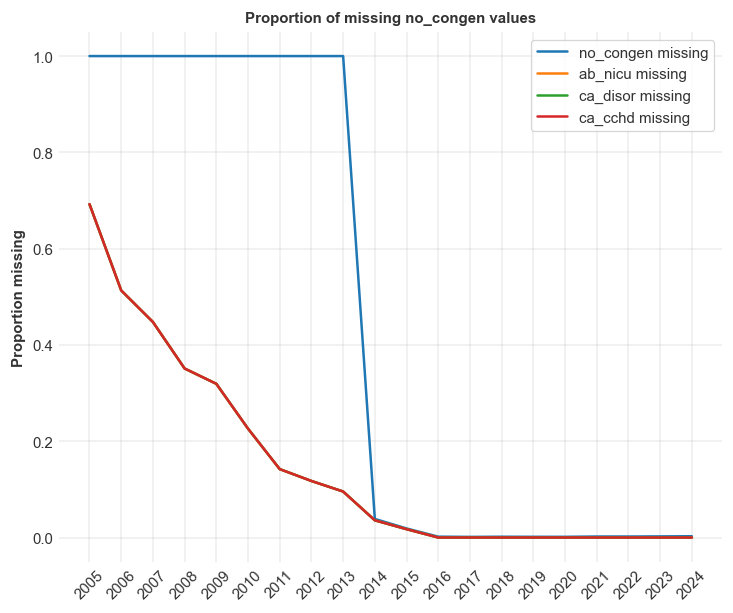

In [17]:
plt.figure(figsize=(6, 5))
plt.plot(df["year"], df["no_congen"], label="no_congen missing")
plt.plot(df["year"], df["ab_nicu"], label="ab_nicu missing")
plt.plot(df["year"], df["ca_disor"], label="ca_disor missing")
plt.plot(df["year"], df["ca_cchd"], label="ca_cchd missing")
plt.xticks(df["year"], rotation=45)
plt.ylabel("Proportion missing")
plt.title("Proportion of missing no_congen values")
plt.legend()
plt.show()

## Recorded DS births

In [285]:
df = con.execute(
    f"""
    WITH base AS (
    SELECT
        b.year,
        ca_down_c,
        b.p_ds_lb_nt * (1 - r.reduction) as ds_lb_est
    FROM us_births AS b
    LEFT JOIN reduction_rate_year r
        ON b.year = r.year
    WHERE b.year >= 1989
    )
    SELECT
        year,
        COUNT(*) FILTER (WHERE ca_down_c = 'C') AS confirmed,
        COUNT(*) FILTER (WHERE ca_down_c = 'P') AS pending,
        COUNT(*) FILTER (WHERE ca_down_c = 'N') AS no,
        COUNT(*) FILTER (WHERE ca_down_c = 'U') AS unknown,
        COUNT(*) FILTER (WHERE ca_down_c IS NULL) AS missing,
        COUNT(*) AS total,
        SUM(ds_lb_est) AS ds_lb_est
    FROM base
    GROUP BY year
    ORDER BY year;
    """
).df()
df

,year,confirmed,pending,no,unknown,missing,total,ds_lb_est
0,1989,1954,0,3333072,710667,0,4045693,4201.805434
1,1990,1983,0,3640029,520905,0,4162917,4394.402030
2,1991,1791,0,3615670,497881,0,4115342,4433.762142
3,1992,1816,0,3623516,444096,0,4069428,4408.741077
4,1993,1763,0,3741591,261169,0,4004523,4378.555635
5,1994,1706,0,3742596,212623,0,3956925,4361.998372
6,1995,1640,0,3623396,205580,72396,3903012,4376.564560
7,1996,1677,0,3810598,82599,0,3894874,4281.998480
8,1997,1663,0,3797601,85065,0,3884329,4367.179471
9,1998,1682,0,3849804,93706,0,3945192,4483.180629


In [ ]:
plt.figure(figsize=(7,4))
# plt.fill_between(range(2003, 2015), 2250, color="#d8f0ff", alpha=0.4)
plt.bar(df["year"], df["pending"], bottom=df["confirmed"], label="DS diagnosis pending")
plt.bar(df["year"], df["confirmed"], label="DS diagnosis confirmed")
plt.plot(df["year"], (df["ds_lb_est"] * 0.4), marker="o", color="#33a066", label="40% of estimated live births (annual reduction rates)")
plt.xlim(1988.2, 2024.8)
plt.xticks(range(1990, 2025, 2), rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Births")
# plt.title("Live births of babies with Down syndrome recorded as confirmed or pending")
plt.legend(bbox_to_anchor=(0.03, 0.2), loc="center left")
plt.show()

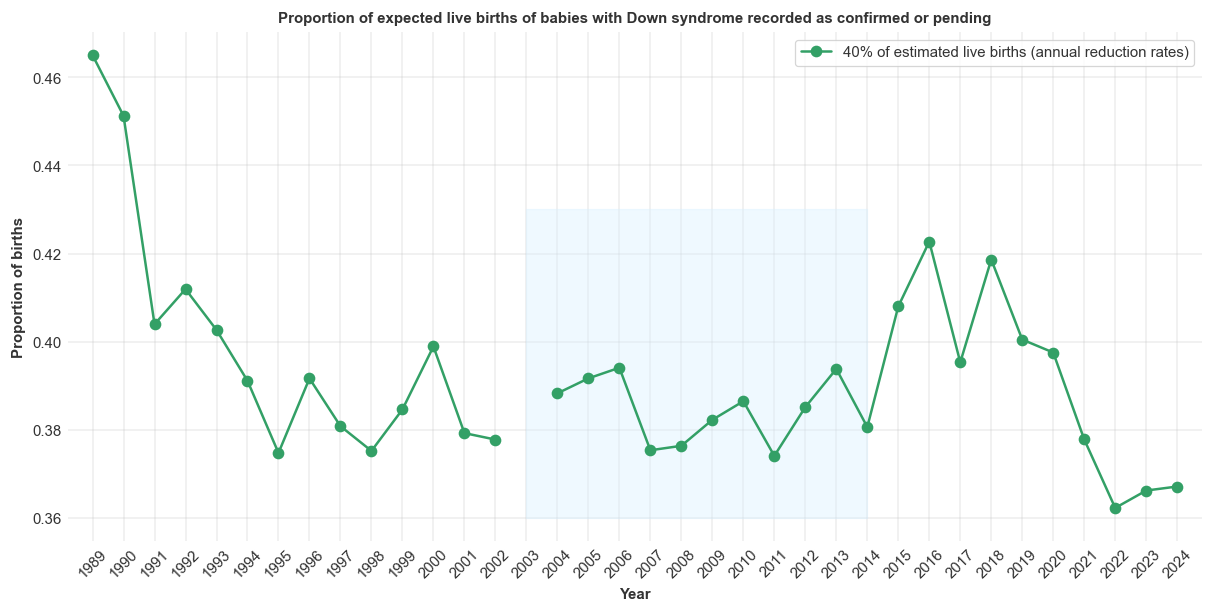

In [287]:
plt.figure(figsize=(10, 5))
plt.fill_between(range(2003, 2015), 0.36, 0.43, color="#d8f0ff", alpha=0.4)
plt.plot(df["year"], ((df["pending"] + df["confirmed"]) / df["ds_lb_est"]), marker="o", color="#33a066", label="40% of estimated live births (annual reduction rates)")
plt.xlim(1988.2, 2024.8)
plt.xticks(range(1989, 2025), rotation=45)
plt.xlabel("Year")
plt.ylabel("Proportion of births")
plt.title("Proportion of expected live births of babies with Down syndrome recorded as confirmed or pending")
plt.legend()
plt.show()

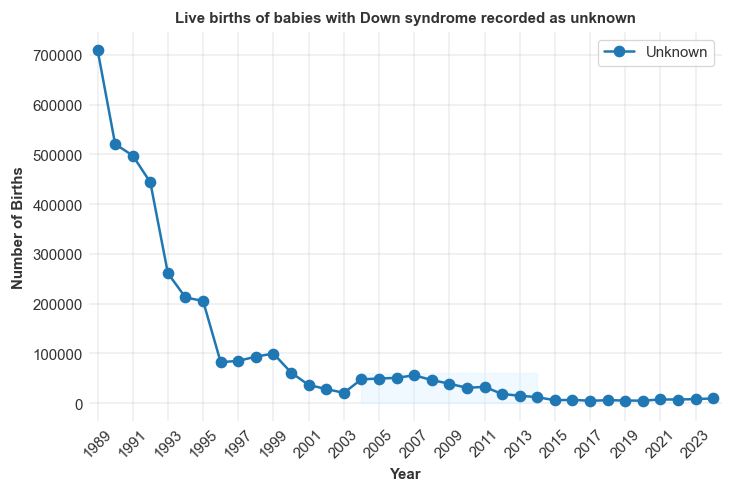

In [292]:
plt.figure(figsize=(6, 4))
plt.fill_between(range(2004, 2015), 59900, color="#d8f0ff", alpha=0.4)
plt.plot(df["year"], df["unknown"], marker="o", label="Unknown")
plt.xlim(1988.5, 2024.5)
plt.xticks(range(1989, 2025, 2), rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Births")
plt.title("Live births of babies with Down syndrome recorded as unknown")
plt.legend()
plt.show()

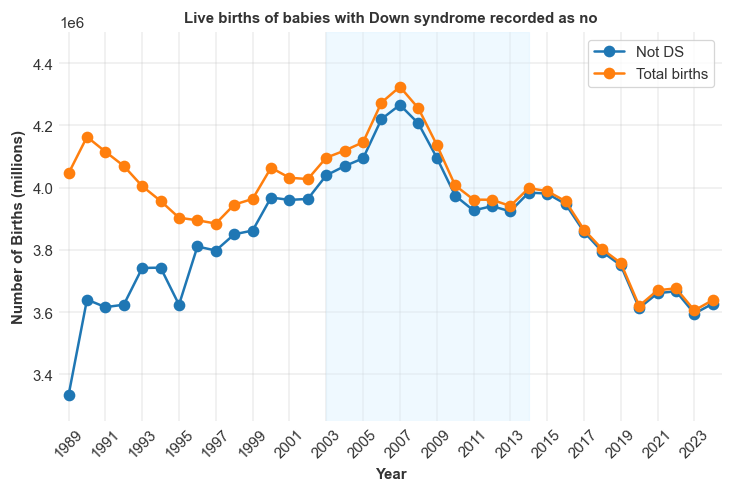

In [289]:
plt.figure(figsize=(6, 4))
plt.plot(df["year"], df["no"], marker="o", label="Not DS")
plt.plot(df["year"], df["total"], marker="o", label="Total births")
plt.fill_between(range(2003, 2015), 4500000, color="#d8f0ff", alpha=0.4)
plt.xlim(1988.5, 2024.5)
plt.xticks(range(1989, 2025, 2), rotation=45)
plt.xlabel("Year")
plt.ylim(3250000, 4500000)
plt.ylabel("Number of Births (millions)")
plt.title("Live births of babies with Down syndrome recorded as no")
plt.legend()
plt.show()

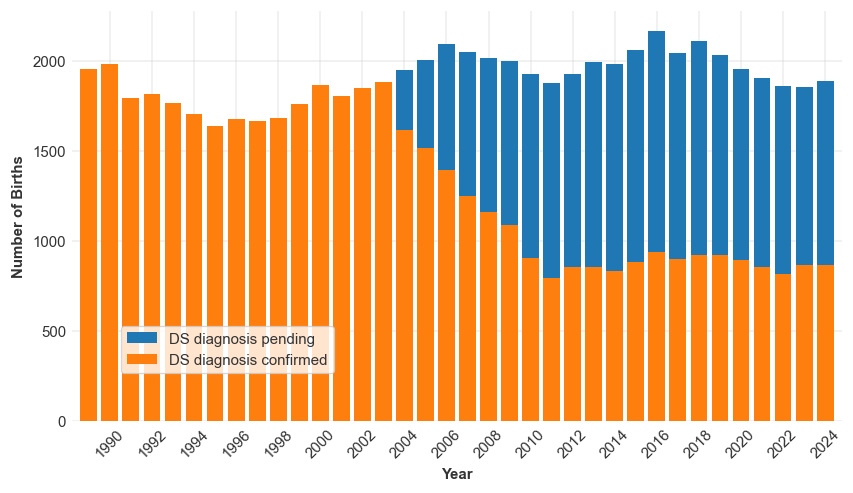

In [306]:
plt.figure(figsize=(7,4))
# plt.fill_between(range(2003, 2015), 2250, color="#d8f0ff", alpha=0.4)
plt.bar(df["year"], df["pending"], bottom=df["confirmed"], label="DS diagnosis pending")
plt.bar(df["year"], df["confirmed"], label="DS diagnosis confirmed")
plt.xlim(1988.2, 2024.8)
plt.xticks(range(1990, 2025, 2), rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Births")
# plt.title("Live births of babies with Down syndrome recorded as confirmed or pending")
plt.legend(bbox_to_anchor=(0.35, 0.25))
plt.show()

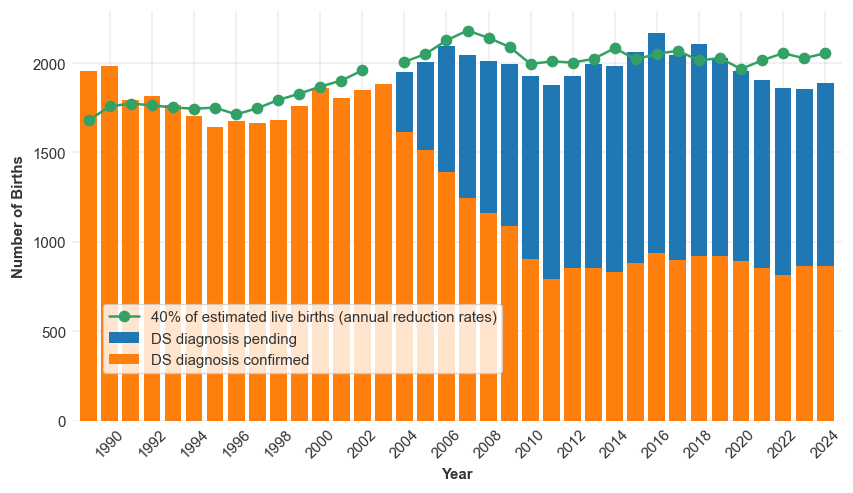

In [317]:
plt.figure(figsize=(7,4))
# plt.fill_between(range(2003, 2015), 2250, color="#d8f0ff", alpha=0.4)
plt.bar(df["year"], df["pending"], bottom=df["confirmed"], label="DS diagnosis pending")
plt.bar(df["year"], df["confirmed"], label="DS diagnosis confirmed")
plt.plot(df["year"], (df["ds_lb_est"] * 0.4), marker="o", color="#33a066", label="40% of estimated live births (annual reduction rates)")
plt.xlim(1988.2, 2024.8)
plt.xticks(range(1990, 2025, 2), rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Births")
# plt.title("Live births of babies with Down syndrome recorded as confirmed or pending")
plt.legend(bbox_to_anchor=(0.03, 0.2), loc="center left")
plt.show()

In [318]:
con.close()